In [1]:
from hima.modules.baselines.cscg import CHMM
import numpy as np

In [2]:
buffer_sizes = [1000, 5000, 10000, 50000, 100000]
clones = [1, 5, 10, 20, 50]
encoder = [10, 25, 50]
seeds = [123, 332, 221]

In [3]:
def train(
    n_obs_states,
    cells_per_column,
    buffer_size,
    seed
):
    data = np.load(f'../logs/animalai_trajectories_{n_obs_states}.npz')
    n_actions = 3
    pseudo_count = 2e-3
    em_iterations = 2000
    term_early = True
    n_hidden_states = n_obs_states * cells_per_column
    alpha = 1.0
    _rng = np.random.default_rng(seed)
    transition_probs = _rng.dirichlet(
        alpha=[alpha] * n_hidden_states * n_actions,
        size=n_hidden_states
    ).reshape((n_actions, n_hidden_states, n_hidden_states))
    state_prior = _rng.dirichlet(alpha=[alpha] * n_hidden_states)
    x = data['x'][:buffer_size]
    a = data['a'][:buffer_size]
    chmm = CHMM(
        np.full(n_obs_states, fill_value=cells_per_column),
        x,
        a,
        pseudocount=pseudo_count,
        dtype=np.float64,
        seed=seed
    )
    chmm.T = transition_probs
    chmm.Pi_x = state_prior
    learning_curve = chmm.learn_em_T_Pi_x(x, a, n_iter=em_iterations, term_early=term_early)
    return learning_curve[-1]

In [4]:
results = {
    'n_obs': [],
    'data_size': [],
    'n_clones': [],
    'seed': [],
    'surprise': []
}

In [5]:
for enc in encoder:
    for bs in buffer_sizes:
        for clone in clones:
            for seed in seeds:
                surprise = train(enc, clone, bs, seed)
                results['n_obs'].append(enc)
                results['data_size'].append(bs)
                results['n_clones'].append(clone)
                results['seed'].append(seed)
                results['surprise'].append(surprise)

Average number of clones: 1.0


  0%|▏                                                                                                                                                                           | 2/2000 [00:12<3:34:15,  6.43s/it, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:15, 127.71it/s, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:13, 146.29it/s, train_bps=1.04]

Average number of clones: 5.0



 14%|████████████████████████▍                                                                                                                                                 | 288/2000 [00:01<00:08, 191.28it/s, train_bps=0.332]


Average number of clones: 5.0


 17%|████████████████████████████▍                                                                                                                                             | 335/2000 [00:03<00:15, 110.24it/s, train_bps=0.316]


Average number of clones: 5.0


 17%|████████████████████████████▎                                                                                                                                             | 333/2000 [00:01<00:09, 174.61it/s, train_bps=0.304]


Average number of clones: 10.0


 23%|███████████████████████████████████████▏                                                                                                                                   | 459/2000 [00:03<00:10, 149.43it/s, train_bps=0.19]


Average number of clones: 10.0


  8%|██████████████▍                                                                                                                                                           | 170/2000 [00:01<00:12, 140.98it/s, train_bps=0.211]


Average number of clones: 10.0


 11%|██████████████████▋                                                                                                                                                       | 220/2000 [00:01<00:12, 141.15it/s, train_bps=0.188]


Average number of clones: 20.0


 14%|████████████████████████▊                                                                                                                                                   | 288/2000 [00:04<00:25, 67.55it/s, train_bps=0.24]


Average number of clones: 20.0


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 1459/2000 [00:22<00:08, 63.68it/s, train_bps=0.225]


Average number of clones: 20.0


  4%|██████▉                                                                                                                                                                     | 80/2000 [00:01<00:27, 69.25it/s, train_bps=0.261]


Average number of clones: 50.0


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 1334/2000 [01:38<00:49, 13.55it/s, train_bps=0.502]


Average number of clones: 50.0


  4%|██████▋                                                                                                                                                                     | 78/2000 [00:05<02:12, 14.54it/s, train_bps=0.502]


Average number of clones: 50.0


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 1617/2000 [02:00<00:28, 13.46it/s, train_bps=0.488]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:30, 65.11it/s, train_bps=0.996]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:32, 61.71it/s, train_bps=0.996]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:28, 71.06it/s, train_bps=0.996]

Average number of clones: 5.0



 32%|██████████████████████████████████████████████████████▍                                                                                                                    | 636/2000 [00:09<00:20, 65.27it/s, train_bps=0.376]


Average number of clones: 5.0


 17%|█████████████████████████████▌                                                                                                                                             | 346/2000 [00:04<00:21, 76.62it/s, train_bps=0.379]


Average number of clones: 5.0


 28%|███████████████████████████████████████████████                                                                                                                            | 551/2000 [00:07<00:19, 74.74it/s, train_bps=0.374]


Average number of clones: 10.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 47.33it/s, train_bps=0.263]

Average number of clones: 10.0



 15%|██████████████████████████                                                                                                                                                 | 305/2000 [00:07<00:40, 41.48it/s, train_bps=0.241]

Average number of clones: 10.0



 39%|███████████████████████████████████████████████████████████████████▏                                                                                                       | 786/2000 [00:17<00:27, 43.80it/s, train_bps=0.249]


Average number of clones: 20.0


 15%|█████████████████████████▉                                                                                                                                                 | 304/2000 [00:16<01:34, 17.94it/s, train_bps=0.209]


Average number of clones: 20.0


 16%|███████████████████████████▊                                                                                                                                               | 325/2000 [00:15<01:20, 20.71it/s, train_bps=0.196]


Average number of clones: 20.0


 12%|█████████████████████                                                                                                                                                      | 246/2000 [00:12<01:32, 19.05it/s, train_bps=0.206]


Average number of clones: 50.0


 13%|█████████████████████▉                                                                                                                                                     | 256/2000 [01:12<08:14,  3.53it/s, train_bps=0.273]

Average number of clones: 50.0



  6%|█████████▋                                                                                                                                                                 | 114/2000 [00:29<08:12,  3.83it/s, train_bps=0.278]

Average number of clones: 50.0



 16%|███████████████████████████▎                                                                                                                                               | 320/2000 [01:26<07:36,  3.68it/s, train_bps=0.275]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<01:05, 30.51it/s, train_bps=1.02]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<01:32, 21.58it/s, train_bps=1.02]


Average number of clones: 1.0


  0%|▏                                                                                                                                                                             | 2/2000 [00:00<01:07, 29.41it/s, train_bps=1.02]


Average number of clones: 5.0


 36%|██████████████████████████████████████████████████████████████▍                                                                                                            | 730/2000 [00:19<00:33, 38.03it/s, train_bps=0.402]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:48<00:00, 41.38it/s, train_bps=0.405]

Average number of clones: 5.0



 54%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 1070/2000 [00:27<00:23, 39.58it/s, train_bps=0.398]


Average number of clones: 10.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:15<00:00, 26.60it/s, train_bps=0.272]

Average number of clones: 10.0



 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 1218/2000 [00:45<00:28, 27.01it/s, train_bps=0.27]

Average number of clones: 10.0



 36%|██████████████████████████████████████████████████████████████▍                                                                                                             | 726/2000 [00:28<00:49, 25.60it/s, train_bps=0.28]


Average number of clones: 20.0


 28%|███████████████████████████████████████████████▎                                                                                                                           | 553/2000 [00:48<02:07, 11.36it/s, train_bps=0.209]


Average number of clones: 20.0


 20%|██████████████████████████████████▏                                                                                                                                        | 400/2000 [00:32<02:11, 12.18it/s, train_bps=0.209]


Average number of clones: 20.0


 17%|█████████████████████████████▋                                                                                                                                             | 347/2000 [00:28<02:17, 12.01it/s, train_bps=0.217]

Average number of clones: 50.0



  8%|█████████████▊                                                                                                                                                             | 162/2000 [01:22<15:36,  1.96it/s, train_bps=0.245]

Average number of clones: 50.0



 15%|█████████████████████████▍                                                                                                                                                 | 298/2000 [02:25<13:53,  2.04it/s, train_bps=0.248]

Average number of clones: 50.0



 14%|███████████████████████▋                                                                                                                                                    | 276/2000 [01:13<07:41,  3.73it/s, train_bps=0.24]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:30,  9.50it/s, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:43,  8.96it/s, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:33,  9.36it/s, train_bps=1.04]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:05<00:00, 10.80it/s, train_bps=0.453]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:05<00:00, 10.77it/s, train_bps=0.473]


Average number of clones: 5.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:00<00:00, 11.11it/s, train_bps=0.458]


Average number of clones: 10.0


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1878/2000 [04:22<00:17,  7.15it/s, train_bps=0.342]

Average number of clones: 10.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:36<00:00,  7.23it/s, train_bps=0.333]

Average number of clones: 10.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:33<00:00,  7.32it/s, train_bps=0.333]

Average number of clones: 20.0



 39%|███████████████████████████████████████████████████████████████████▎                                                                                                       | 787/2000 [04:10<06:26,  3.14it/s, train_bps=0.247]

Average number of clones: 20.0



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 1608/2000 [08:46<02:08,  3.05it/s, train_bps=0.246]

Average number of clones: 20.0



 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 1855/2000 [10:41<00:50,  2.89it/s, train_bps=0.251]

Average number of clones: 50.0



 21%|███████████████████████████████████▍                                                                                                                                       | 415/2000 [11:00<42:03,  1.59s/it, train_bps=0.204]

Average number of clones: 50.0



 29%|█████████████████████████████████████████████████▉                                                                                                                         | 584/2000 [12:06<29:21,  1.24s/it, train_bps=0.208]

Average number of clones: 50.0



 40%|████████████████████████████████████████████████████████████████████▍                                                                                                      | 801/2000 [14:41<21:59,  1.10s/it, train_bps=0.202]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<05:37,  5.91it/s, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<05:13,  6.38it/s, train_bps=1.04]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<05:15,  6.33it/s, train_bps=1.04]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:42<00:00,  7.09it/s, train_bps=0.461]

Average number of clones: 5.0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:52<00:00,  6.85it/s, train_bps=0.49]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:47<00:00,  6.95it/s, train_bps=0.461]

Average number of clones: 10.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [06:50<00:00,  4.87it/s, train_bps=0.347]

Average number of clones: 10.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [05:02<00:00,  6.62it/s, train_bps=0.339]

Average number of clones: 10.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:09<00:00,  8.03it/s, train_bps=0.342]

Average number of clones: 20.0



 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 1440/2000 [06:25<02:30,  3.73it/s, train_bps=0.257]

Average number of clones: 20.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:37<00:00,  3.86it/s, train_bps=0.251]

Average number of clones: 20.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:29<00:00,  3.93it/s, train_bps=0.252]

Average number of clones: 50.0



 54%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 1073/2000 [22:37<19:32,  1.27s/it, train_bps=0.184]

Average number of clones: 50.0



 37%|███████████████████████████████████████████████████████████████                                                                                                            | 738/2000 [15:26<26:24,  1.26s/it, train_bps=0.196]

Average number of clones: 50.0



 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 1285/2000 [26:57<15:00,  1.26s/it, train_bps=0.187]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:03, 551.01it/s, train_bps=0.653]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:03, 607.03it/s, train_bps=0.653]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:03, 639.18it/s, train_bps=0.653]

Average number of clones: 5.0



  6%|█████████▊                                                                                                                                                                | 115/2000 [00:00<00:03, 538.95it/s, train_bps=0.193]


Average number of clones: 5.0


 11%|██████████████████                                                                                                                                                        | 213/2000 [00:00<00:03, 589.64it/s, train_bps=0.193]


Average number of clones: 5.0


  4%|███████                                                                                                                                                                    | 83/2000 [00:00<00:03, 577.06it/s, train_bps=0.199]


Average number of clones: 10.0


  4%|██████                                                                                                                                                                     | 71/2000 [00:00<00:04, 406.10it/s, train_bps=0.229]


Average number of clones: 10.0


  4%|███████▌                                                                                                                                                                   | 89/2000 [00:00<00:04, 396.22it/s, train_bps=0.217]


Average number of clones: 10.0


  4%|███████▎                                                                                                                                                                   | 86/2000 [00:00<00:04, 398.35it/s, train_bps=0.233]


Average number of clones: 20.0


  3%|█████▍                                                                                                                                                                     | 63/2000 [00:00<00:11, 169.68it/s, train_bps=0.328]


Average number of clones: 20.0


  3%|█████▍                                                                                                                                                                     | 64/2000 [00:00<00:11, 161.60it/s, train_bps=0.344]


Average number of clones: 20.0


  4%|███████▌                                                                                                                                                                   | 89/2000 [00:00<00:11, 162.59it/s, train_bps=0.342]


Average number of clones: 50.0


  9%|████████████████                                                                                                                                                           | 188/2000 [00:16<02:38, 11.41it/s, train_bps=0.666]


Average number of clones: 50.0


 50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 1000/2000 [01:40<01:40,  9.92it/s, train_bps=0.669]

Average number of clones: 50.0



 51%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 1018/2000 [06:39<06:25,  2.55it/s, train_bps=0.673]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:13, 153.14it/s, train_bps=0.895]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:10, 190.61it/s, train_bps=0.895]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:11, 170.29it/s, train_bps=0.895]

Average number of clones: 5.0



 13%|██████████████████████▍                                                                                                                                                   | 264/2000 [00:01<00:08, 196.08it/s, train_bps=0.308]


Average number of clones: 5.0


 23%|███████████████████████████████████████                                                                                                                                   | 460/2000 [00:02<00:08, 191.75it/s, train_bps=0.293]


Average number of clones: 5.0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.71it/s, train_bps=0.301]


Average number of clones: 10.0


  8%|██████████████                                                                                                                                                            | 166/2000 [00:01<00:14, 125.92it/s, train_bps=0.229]

Average number of clones: 10.0



 10%|████████████████▏                                                                                                                                                         | 191/2000 [00:01<00:14, 124.49it/s, train_bps=0.233]


Average number of clones: 10.0


 13%|██████████████████████▎                                                                                                                                                   | 262/2000 [00:02<00:14, 123.21it/s, train_bps=0.226]


Average number of clones: 20.0


  8%|██████████████                                                                                                                                                             | 165/2000 [00:02<00:32, 56.84it/s, train_bps=0.275]

Average number of clones: 20.0



  7%|███████████▋                                                                                                                                                               | 137/2000 [00:02<00:35, 52.49it/s, train_bps=0.284]

Average number of clones: 20.0



  8%|████████████▊                                                                                                                                                              | 150/2000 [00:02<00:33, 55.41it/s, train_bps=0.284]


Average number of clones: 50.0


  6%|█████████▊                                                                                                                                                                 | 115/2000 [00:41<11:19,  2.77it/s, train_bps=0.446]


Average number of clones: 50.0


  9%|██████████████▉                                                                                                                                                             | 173/2000 [01:04<11:22,  2.68it/s, train_bps=0.43]


Average number of clones: 50.0


  9%|██████████████▉                                                                                                                                                            | 174/2000 [00:54<09:32,  3.19it/s, train_bps=0.441]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:21, 91.72it/s, train_bps=0.917]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:20, 96.60it/s, train_bps=0.917]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:20, 98.84it/s, train_bps=0.917]

Average number of clones: 5.0



 45%|█████████████████████████████████████████████████████████████████████████████                                                                                             | 907/2000 [00:08<00:10, 104.98it/s, train_bps=0.338]

Average number of clones: 5.0



 29%|████████████████████████████████████████████████▊                                                                                                                         | 575/2000 [00:05<00:14, 101.01it/s, train_bps=0.342]

Average number of clones: 5.0



 25%|███████████████████████████████████████████▌                                                                                                                               | 509/2000 [00:05<00:15, 96.34it/s, train_bps=0.354]


Average number of clones: 10.0


 17%|████████████████████████████▋                                                                                                                                              | 336/2000 [00:04<00:24, 67.57it/s, train_bps=0.243]


Average number of clones: 10.0


 13%|█████████████████████▋                                                                                                                                                     | 253/2000 [00:03<00:26, 67.11it/s, train_bps=0.261]


Average number of clones: 10.0


 29%|█████████████████████████████████████████████████▍                                                                                                                         | 578/2000 [00:08<00:21, 67.48it/s, train_bps=0.242]


Average number of clones: 20.0


 14%|████████████████████████▌                                                                                                                                                  | 288/2000 [00:09<00:54, 31.27it/s, train_bps=0.261]

Average number of clones: 20.0



 16%|███████████████████████████                                                                                                                                                | 317/2000 [00:10<00:54, 30.81it/s, train_bps=0.263]

Average number of clones: 20.0



  7%|███████████▋                                                                                                                                                               | 137/2000 [00:04<00:59, 31.32it/s, train_bps=0.256]


Average number of clones: 50.0


  7%|███████████▎                                                                                                                                                               | 132/2000 [01:17<18:18,  1.70it/s, train_bps=0.387]


Average number of clones: 50.0


  6%|█████████▍                                                                                                                                                                 | 111/2000 [00:51<14:36,  2.15it/s, train_bps=0.383]


Average number of clones: 50.0


  4%|███████▎                                                                                                                                                                     | 84/2000 [00:38<14:31,  2.20it/s, train_bps=0.38]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:28, 22.56it/s, train_bps=0.952]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:29, 22.41it/s, train_bps=0.952]


Average number of clones: 1.0


  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:30, 22.01it/s, train_bps=0.952]

Average number of clones: 5.0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:23<00:00, 23.86it/s, train_bps=0.39]

Average number of clones: 5.0



 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 1778/2000 [01:16<00:09, 23.36it/s, train_bps=0.39]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:25<00:00, 23.42it/s, train_bps=0.384]

Average number of clones: 10.0



 35%|███████████████████████████████████████████████████████████▍                                                                                                               | 695/2000 [00:43<01:21, 15.93it/s, train_bps=0.275]

Average number of clones: 10.0



 31%|█████████████████████████████████████████████████████▋                                                                                                                     | 628/2000 [00:39<01:26, 15.85it/s, train_bps=0.271]

Average number of clones: 10.0



 45%|█████████████████████████████████████████████████████████████████████████████▏                                                                                             | 903/2000 [00:55<01:07, 16.19it/s, train_bps=0.278]

Average number of clones: 20.0



 38%|████████████████████████████████████████████████████████████████▎                                                                                                          | 752/2000 [01:45<02:54,  7.14it/s, train_bps=0.223]

Average number of clones: 20.0



 34%|██████████████████████████████████████████████████████████▏                                                                                                                | 680/2000 [01:35<03:05,  7.13it/s, train_bps=0.226]

Average number of clones: 20.0



 41%|█████████████████████████████████████████████████████████████████████▊                                                                                                     | 817/2000 [01:55<02:46,  7.10it/s, train_bps=0.213]


Average number of clones: 50.0


 26%|█████████████████████████████████████████████                                                                                                                              | 527/2000 [09:08<25:32,  1.04s/it, train_bps=0.256]


Average number of clones: 50.0


 12%|████████████████████                                                                                                                                                       | 235/2000 [03:36<27:06,  1.09it/s, train_bps=0.256]


Average number of clones: 50.0


 14%|███████████████████████▉                                                                                                                                                   | 280/2000 [04:18<26:30,  1.08it/s, train_bps=0.262]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:06, 10.72it/s, train_bps=0.95]


Average number of clones: 1.0


  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:26,  9.68it/s, train_bps=0.95]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                             | 2/2000 [00:00<03:21,  9.89it/s, train_bps=0.95]

Average number of clones: 5.0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:39<00:00, 12.52it/s, train_bps=0.39]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:41<00:00, 12.41it/s, train_bps=0.391]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:39<00:00, 12.51it/s, train_bps=0.387]

Average number of clones: 10.0



 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 1184/2000 [02:23<01:38,  8.27it/s, train_bps=0.278]

Average number of clones: 10.0



 49%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 981/2000 [01:58<02:02,  8.30it/s, train_bps=0.284]

Average number of clones: 10.0



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 1610/2000 [03:11<00:46,  8.40it/s, train_bps=0.272]

Average number of clones: 20.0



 35%|████████████████████████████████████████████████████████████▌                                                                                                              | 709/2000 [03:11<05:49,  3.69it/s, train_bps=0.208]

Average number of clones: 20.0



 34%|█████████████████████████████████████████████████████████▌                                                                                                                 | 673/2000 [03:04<06:04,  3.64it/s, train_bps=0.214]

Average number of clones: 20.0



 33%|█████████████████████████████████████████████████████████                                                                                                                  | 668/2000 [03:02<06:03,  3.66it/s, train_bps=0.205]


Average number of clones: 50.0


 23%|██████████████████████████████████████▋                                                                                                                                    | 453/2000 [13:44<46:57,  1.82s/it, train_bps=0.217]


Average number of clones: 50.0


 18%|█████████████████████████████▉                                                                                                                                             | 350/2000 [10:34<49:50,  1.81s/it, train_bps=0.218]

Average number of clones: 50.0



 20%|██████████████████████████████████▎                                                                                                                                        | 402/2000 [12:39<50:19,  1.89s/it, train_bps=0.214]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:03, 509.82it/s, train_bps=0.518]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:04, 455.63it/s, train_bps=0.518]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:03, 508.15it/s, train_bps=0.518]

Average number of clones: 5.0



  4%|██████▋                                                                                                                                                                     | 78/2000 [00:00<00:04, 454.08it/s, train_bps=0.26]


Average number of clones: 5.0


  4%|███████▍                                                                                                                                                                   | 87/2000 [00:00<00:03, 502.32it/s, train_bps=0.264]


Average number of clones: 5.0


  4%|██████▏                                                                                                                                                                    | 73/2000 [00:00<00:04, 461.17it/s, train_bps=0.274]


Average number of clones: 10.0


  6%|█████████▌                                                                                                                                                                | 113/2000 [00:00<00:08, 223.22it/s, train_bps=0.397]


Average number of clones: 10.0


  5%|███████▊                                                                                                                                                                   | 91/2000 [00:00<00:08, 229.31it/s, train_bps=0.391]


Average number of clones: 10.0


  7%|███████████▍                                                                                                                                                              | 134/2000 [00:00<00:08, 225.85it/s, train_bps=0.395]


Average number of clones: 20.0


 29%|█████████████████████████████████████████████████▌                                                                                                                         | 579/2000 [00:08<00:20, 69.04it/s, train_bps=0.617]


Average number of clones: 20.0


  3%|████▍                                                                                                                                                                       | 51/2000 [00:00<00:28, 67.51it/s, train_bps=0.627]


Average number of clones: 20.0


 13%|█████████████████████▉                                                                                                                                                     | 256/2000 [00:03<00:26, 65.30it/s, train_bps=0.618]


Average number of clones: 50.0


 33%|████████████████████████████████████████████████████████▌                                                                                                                   | 657/2000 [05:35<11:26,  1.96it/s, train_bps=1.11]


Average number of clones: 50.0


 14%|████████████████████████▏                                                                                                                                                   | 281/2000 [02:55<17:53,  1.60it/s, train_bps=1.14]


Average number of clones: 50.0


 20%|█████████████████████████████████▌                                                                                                                                          | 390/2000 [03:44<15:26,  1.74it/s, train_bps=1.11]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:11, 172.86it/s, train_bps=0.724]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:11, 180.64it/s, train_bps=0.724]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                           | 2/2000 [00:00<00:12, 155.49it/s, train_bps=0.724]

Average number of clones: 5.0



 28%|██████████████████████████████████████████████▉                                                                                                                           | 552/2000 [00:03<00:08, 163.88it/s, train_bps=0.256]


Average number of clones: 5.0


  8%|█████████████▍                                                                                                                                                            | 158/2000 [00:00<00:11, 162.36it/s, train_bps=0.258]


Average number of clones: 5.0


  8%|████████████▊                                                                                                                                                             | 151/2000 [00:00<00:11, 165.02it/s, train_bps=0.267]


Average number of clones: 10.0


  5%|████████▋                                                                                                                                                                  | 102/2000 [00:01<00:19, 96.96it/s, train_bps=0.294]


Average number of clones: 10.0


  8%|██████████████▌                                                                                                                                                            | 170/2000 [00:01<00:19, 95.21it/s, train_bps=0.288]


Average number of clones: 10.0


  7%|████████████▏                                                                                                                                                              | 142/2000 [00:01<00:19, 95.41it/s, train_bps=0.287]


Average number of clones: 20.0


  3%|█████                                                                                                                                                                        | 59/2000 [00:01<00:57, 33.48it/s, train_bps=0.41]


Average number of clones: 20.0


  5%|████████▎                                                                                                                                                                   | 97/2000 [00:02<00:55, 34.60it/s, train_bps=0.407]


Average number of clones: 20.0


  5%|████████▌                                                                                                                                                                  | 100/2000 [00:02<00:56, 33.78it/s, train_bps=0.411]


Average number of clones: 50.0


  9%|████████████████▏                                                                                                                                                          | 189/2000 [02:13<21:16,  1.42it/s, train_bps=0.654]


Average number of clones: 50.0


  5%|████████▋                                                                                                                                                                  | 101/2000 [01:08<21:27,  1.47it/s, train_bps=0.652]


Average number of clones: 50.0


  6%|██████████                                                                                                                                                                 | 118/2000 [01:21<21:44,  1.44it/s, train_bps=0.656]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:23, 84.27it/s, train_bps=0.765]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:21, 91.13it/s, train_bps=0.765]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<00:22, 90.52it/s, train_bps=0.765]

Average number of clones: 5.0



 19%|███████████████████████████████▉                                                                                                                                            | 371/2000 [00:04<00:17, 92.00it/s, train_bps=0.27]


Average number of clones: 5.0


 20%|██████████████████████████████████▋                                                                                                                                        | 406/2000 [00:04<00:17, 90.80it/s, train_bps=0.263]

Average number of clones: 5.0



 13%|█████████████████████▊                                                                                                                                                     | 255/2000 [00:02<00:19, 87.28it/s, train_bps=0.266]


Average number of clones: 10.0


 19%|███████████████████████████████▉                                                                                                                                           | 373/2000 [00:06<00:28, 57.74it/s, train_bps=0.255]


Average number of clones: 10.0


 10%|████████████████▏                                                                                                                                                          | 190/2000 [00:03<00:31, 58.37it/s, train_bps=0.258]


Average number of clones: 10.0


  8%|█████████████▎                                                                                                                                                             | 155/2000 [00:02<00:32, 57.61it/s, train_bps=0.256]


Average number of clones: 20.0


  6%|█████████▍                                                                                                                                                                 | 110/2000 [00:04<01:20, 23.35it/s, train_bps=0.338]


Average number of clones: 20.0


  8%|█████████████                                                                                                                                                              | 153/2000 [00:06<01:19, 23.10it/s, train_bps=0.331]


Average number of clones: 20.0


  7%|███████████▎                                                                                                                                                                | 132/2000 [00:05<01:19, 23.53it/s, train_bps=0.35]


Average number of clones: 50.0


  9%|████████████████                                                                                                                                                           | 188/2000 [02:25<23:24,  1.29it/s, train_bps=0.527]


Average number of clones: 50.0


  4%|██████▎                                                                                                                                                                     | 74/2000 [00:59<25:46,  1.25it/s, train_bps=0.526]


Average number of clones: 50.0


  8%|████████████▉                                                                                                                                                               | 151/2000 [01:58<24:11,  1.27it/s, train_bps=0.53]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:33, 21.37it/s, train_bps=0.834]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:32, 21.53it/s, train_bps=0.834]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<01:33, 21.26it/s, train_bps=0.834]

Average number of clones: 5.0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:28<00:00, 22.58it/s, train_bps=0.31]

Average number of clones: 5.0



 44%|███████████████████████████████████████████████████████████████████████████▌                                                                                                | 879/2000 [00:39<00:50, 22.38it/s, train_bps=0.31]

Average number of clones: 5.0



 16%|███████████████████████████▎                                                                                                                                               | 320/2000 [00:14<01:14, 22.54it/s, train_bps=0.311]


Average number of clones: 10.0


 28%|████████████████████████████████████████████████▏                                                                                                                          | 563/2000 [00:38<01:37, 14.80it/s, train_bps=0.239]

Average number of clones: 10.0



 43%|████████████████████████████████████████████████████████████████████████▊                                                                                                  | 852/2000 [00:57<01:16, 14.95it/s, train_bps=0.239]

Average number of clones: 10.0



 37%|███████████████████████████████████████████████████████████████▍                                                                                                            | 738/2000 [00:49<01:25, 14.82it/s, train_bps=0.24]


Average number of clones: 20.0


 17%|█████████████████████████████▋                                                                                                                                             | 347/2000 [00:56<04:30,  6.10it/s, train_bps=0.241]


Average number of clones: 20.0


 15%|██████████████████████████▏                                                                                                                                                | 307/2000 [00:51<04:43,  5.96it/s, train_bps=0.247]


Average number of clones: 20.0


 21%|███████████████████████████████████▏                                                                                                                                       | 411/2000 [01:09<04:29,  5.90it/s, train_bps=0.241]


Average number of clones: 50.0


  9%|████████████████                                                                                                                                                           | 188/2000 [04:17<41:24,  1.37s/it, train_bps=0.336]


Average number of clones: 50.0


  8%|█████████████▏                                                                                                                                                             | 154/2000 [03:30<42:02,  1.37s/it, train_bps=0.334]


Average number of clones: 50.0


 11%|██████████████████▎                                                                                                                                                        | 214/2000 [04:42<39:19,  1.32s/it, train_bps=0.336]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<02:59, 11.10it/s, train_bps=0.835]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<03:10, 10.51it/s, train_bps=0.835]

Average number of clones: 1.0



  0%|▏                                                                                                                                                                            | 2/2000 [00:00<03:07, 10.68it/s, train_bps=0.835]

Average number of clones: 5.0



 41%|██████████████████████████████████████████████████████████████████████▍                                                                                                    | 824/2000 [01:05<01:33, 12.53it/s, train_bps=0.321]

Average number of clones: 5.0



 50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 1001/2000 [01:23<01:22, 12.06it/s, train_bps=0.318]

Average number of clones: 5.0



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:41<00:00, 12.42it/s, train_bps=0.311]

Average number of clones: 10.0



 34%|█████████████████████████████████████████████████████████▌                                                                                                                 | 673/2000 [01:22<02:42,  8.19it/s, train_bps=0.238]

Average number of clones: 10.0



 41%|█████████████████████████████████████████████████████████████████████▍                                                                                                     | 812/2000 [01:38<02:24,  8.22it/s, train_bps=0.231]

Average number of clones: 10.0



 57%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 1139/2000 [02:18<01:44,  8.25it/s, train_bps=0.234]


Average number of clones: 20.0


 25%|██████████████████████████████████████████                                                                                                                                 | 492/2000 [02:23<07:21,  3.42it/s, train_bps=0.209]

Average number of clones: 20.0



 33%|████████████████████████████████████████████████████████▊                                                                                                                  | 664/2000 [03:20<06:43,  3.31it/s, train_bps=0.215]

Average number of clones: 20.0



 25%|██████████████████████████████████████████▎                                                                                                                                 | 492/2000 [02:25<07:25,  3.38it/s, train_bps=0.21]


Average number of clones: 50.0


  9%|████████████████                                                                                                                                                          | 189/2000 [07:02<1:07:24,  2.23s/it, train_bps=0.27]


Average number of clones: 50.0


 20%|██████████████████████████████████▊                                                                                                                                        | 407/2000 [14:59<58:42,  2.21s/it, train_bps=0.269]


Average number of clones: 50.0


 12%|███████████████████▋                                                                                                                                                     | 233/2000 [08:34<1:05:00,  2.21s/it, train_bps=0.268]


In [6]:
import pickle

In [7]:
with open('grid_search_cscg.pkl', 'wb') as file:
    pickle.dump(results, file)

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(results)

In [11]:
df

,n_obs,data_size,n_clones,seed,surprise
0,10,1000,1,123,1.043909
1,10,1000,1,332,1.043909
2,10,1000,1,221,1.043909
3,10,1000,5,123,0.332046
4,10,1000,5,332,0.316292
...,...,...,...,...,...
220,50,100000,20,332,0.215061
221,50,100000,20,221,0.210495
222,50,100000,50,123,0.269971
223,50,100000,50,332,0.268534


In [12]:
df.to_csv('grid_search_cscg_results.csv')

In [15]:
df = df.groupby(['n_obs', 'data_size', 'n_clones']).surprise.agg(surprise_mean='mean', surprise_std='std')

In [16]:
df

surprise_mean  surprise_std
n_obs data_size n_clones                             
10    1000      1              1.043909      0.000000
                5              0.317289      0.014285
                10             0.196482      0.012650
                20             0.242020      0.017966
                50             0.497076      0.007910
...                                 ...           ...
50    100000    1              0.835028      0.000000
                5              0.316438      0.005270
                10             0.233993      0.003574
                20             0.211648      0.003008
                50             0.268883      0.000962

[75 rows x 2 columns]

In [17]:
import seaborn as sns

In [29]:
df.loc[10]

surprise_mean  surprise_std
data_size n_clones                             
1000      1              1.043909      0.000000
          5              0.317289      0.014285
          10             0.196482      0.012650
          20             0.242020      0.017966
          50             0.497076      0.007910
5000      1              0.995812      0.000000
          5              0.376643      0.002430
          10             0.251116      0.011443
          20             0.203515      0.006628
          50             0.275422      0.002652
10000     1              1.018087      0.000000
          5              0.401825      0.003366
          10             0.273872      0.005064
          20             0.211458      0.004874
          50             0.244511      0.004149
50000     1              1.039403      0.000000
          5              0.461194      0.010276
          10             0.335991      0.005278
          20             0.247968      0.002717
          50             0.204476      0.002964
100000    1              1.036990      0.000000
          5              0.470484      0.016668
          10             0.342587      0.003727
          20             0.253497      0.003054
          50             0.188983      0.006232

In [30]:
df.loc[25]

surprise_mean  surprise_std
data_size n_clones                             
1000      1              0.653195      0.000000
          5              0.195072      0.003624
          10             0.226075      0.008296
          20             0.337994      0.008564
          50             0.669330      0.003423
5000      1              0.895481      0.000000
          5              0.300558      0.007439
          10             0.229129      0.003137
          20             0.280655      0.005042
          50             0.438932      0.008008
10000     1              0.916842      0.000000
          5              0.344774      0.008645
          10             0.248475      0.010665
          20             0.259958      0.003806
          50             0.383317      0.003817
50000     1              0.952346      0.000000
          5              0.387922      0.003452
          10             0.274878      0.003601
          20             0.220397      0.006600
          50             0.257623      0.003395
100000    1              0.949599      0.000000
          5              0.389005      0.002250
          10             0.277968      0.005576
          20             0.208970      0.004794
          50             0.216154      0.002052

<Axes: xlabel='n_clones', ylabel='data_size'>

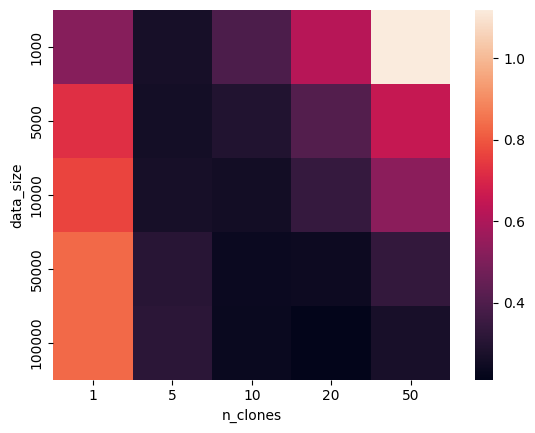

In [34]:
sns.heatmap(df.loc[50]['surprise_mean'].unstack(level=1))

<Axes: xlabel='n_clones', ylabel='data_size'>

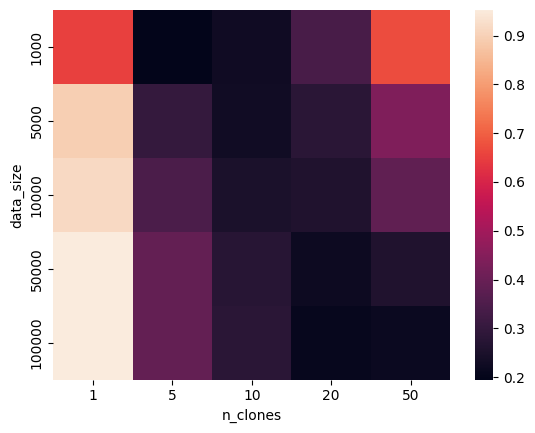

In [35]:
sns.heatmap(df.loc[25]['surprise_mean'].unstack(level=1))

<Axes: xlabel='n_clones', ylabel='data_size'>

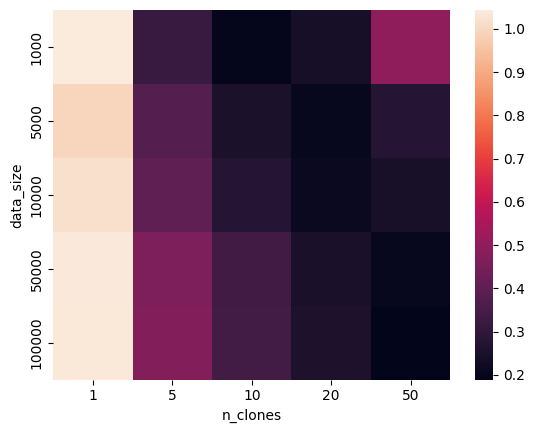

In [36]:
sns.heatmap(df.loc[10]['surprise_mean'].unstack(level=1))

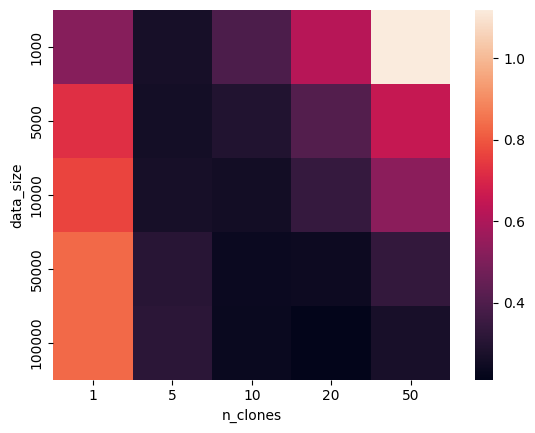

In [37]:
import matplotlib.pyplot as plt
sns.heatmap(df.loc[50]['surprise_mean'].unstack(level=1))
plt.savefig('cscg_grid.png')